<h1 align=center><font size = 5>AI SATURDAY LAGOS COHORT 8</font></h1>   

<h1 align=center><font size = 5>TEAM JOHNSON-SIRLEAF </font></h1>  
<h2 align=center><font size = 6>MACHINE LEARNING APPROACH TO
PREDICTING DIABETES RISKS</font></h2>

<h5 align=center><font size = 2>Data Source: <a href="https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset" target="_blank">Kaggle.<a/></font></h5>

## DATA PREPARATION

### Importing Libraries

In [56]:
import numpy as np                      # for mahematical operations
import pandas as pd                     # for data manipulation and cleaning
import seaborn as sns                   # for data visulization
import plotly.express as px             # for data visulization
import matplotlib.pyplot as plt         # for data visulization

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

### Loading Data

In [57]:
# Read in dataset
df = pd.read_csv('../data/diabetes_prediction_dataset.csv')

In [58]:
df.head(3)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0


### Data Dictionary

| variable       | class     | description                                                                  |
|:---------------|:----------|:-----------------------------------------------------------------------------|
| Gender               | character | Biological sex of the individual  |
| Age                  | numeric   | Age of the individual  |
| Hypertension         | numeric   | 0 = No Hypertension / 1 = Has Hypertension|
| Heart_disease        | numeric   | 0 = No Heart disease / 1 = Has Heart disease|
| Smoking_history      | character | 5 categories i.e not current,former,No Info,current,never and ever |
| bmi                  | numeric   | Body Mass Index, a measure of body fat based on weight and height|
| HbA1c_level          | numeric   | Hemoglobin A1c, a measure of a person's average blood sugar level over the past 2-3 months|
| Blood_glucose_level  | numeric | Amount of glucose in the bloodstream at a given time|
| Diabetes             | numeric | 0 indicates absence of diabetes, 1 indicates presence of Diabetes|

### Data Exploration

In [5]:
# check the data types of each features
df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
# check the shape of the data
df.shape

(100000, 9)

In [7]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [9]:
# Checking statistics of the numeric features
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


### Data Wrangling

In [10]:
# save a copy of the data
df_copy = df.copy('Dataset/diabetes_prediction_dataset.csv')

In [11]:
def df_wrangle(df, dtype_convert, OneHot_cols):
    '''
    This function wrangles (cleans) our dataset by correcting datypes and One-Hot
    encoding dpecified columns
    
    Inputs
    df: (dataframe), dataframe to wrangle
    dtype_convert: (dictionary), pairs of column, dtype to convert to
    OneHot_col: (list), columns in the dataframe to One-Hot encode
    
    Output
    df: (dataframe), wrangled (cleaned) dataframe
    '''
    
    # convert datatypes to correct formats
    for col, dtype in dtype_convert.items():
        df[col] = df[col].astype(dtype)
        
    # One_Hot encode neccesary columns
    
    # Initialize the One-Hot Encoder
    encoder = OneHotEncoder()
    
    # One-Hot encode each column
    for col in OneHot_cols:
        # variable to store new column names
        df_col_name = []
        
        # unique values in current column
        vals = df[col].unique()             

        for val in vals:
            # replace spaces in values with underscore
            val = val.replace(' ', '_')
            
            # combine initial column name and current value as new column name
            df_col_name.append(col+'_'+val) 
                                            
        # encode the columns
        encoded_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
        
        # rename the new columns
        encoded_df.columns = df_col_name
        
        # add new columns to dataframe
        df = df.join(encoded_df)

    # drop the initial columns
    df.drop(OneHot_cols, axis=1, inplace=True)
    
    return df

In [12]:
df = df_wrangle(df, {'age':'int'}, ['gender', 'smoking_history'])

In [13]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_never,smoking_history_No_Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not_current
0,80,0,1,25.19,6.6,140,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,54,0,0,27.32,6.6,80,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,28,0,0,27.32,5.7,158,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,36,0,0,23.45,5.0,155,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,76,1,1,20.14,4.8,155,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  int32  
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Female                100000 non-null  float64
 8   gender_Male                  100000 non-null  float64
 9   gender_Other                 100000 non-null  float64
 10  smoking_history_never        100000 non-null  float64
 11  smoking_history_No_Info      100000 non-null  float64
 12  smoking_history_current      100000 non-null  float64
 13  

In [15]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_never,smoking_history_No_Info,smoking_history_current,smoking_history_former,smoking_history_ever,smoking_history_not_current
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000
mean,41.875660,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.585520,0.414300,0.000180,0.358160,0.092860,0.040040,0.093520,0.35095,0.06447
std,22.535417,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.492635,0.492603,0.013415,0.479462,0.290238,0.196054,0.291161,0.47727,0.24559
min,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.00000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000


### Defining Model Variables and Target

In [16]:
X = df.drop('diabetes', axis=1)
X.shape

(100000, 15)

In [17]:
y = df['diabetes']
y.shape

(100000,)

## Splitting, Tuning and Model Building

### Data Splitting

For our data splitting, the dataset contains 100,000 samples of data. The splitting would be done in the ratio 90:5:5, which implies 90000 data point for training, 5000 data points for dev set and 5000 data points for test set.

This is because 5% (5,000) samples is enough for each of our development and test sets.

> <b>NOTE</b>: Both dev set and test sets are referred to as validation dataset in our code.

##### Training Set and Validation Set

We will first split our data into 90% (90,000) for training, `X_train` and `y_train` while the reamining 10% (10,000) for validation, `X_val` and `y_val`

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
# 90,000 data points for training of dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=123)

##### Validation Set - Dev and Test set
We are going to use about 10,000 data points for our validation test set. The `X_dev` and `y_dev` is the training dataset in the validation cycle, while the `X_test` and `y_test` are the test dataset in the validation cycle.

In [62]:
X_dev, X_test, y_dev, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=123)

In [63]:
print(f'Shape of X_train {X_train.shape}    Shape of y_train {y_train.shape}')
print(f'Shape of X_dev {X_dev.shape}       Shape of y_dev {y_dev.shape}')
print(f'Shape of X_test {X_test.shape}      Shape of y_test {y_test.shape}')

Shape of X_train (90000, 15)    Shape of y_train (90000,)
Shape of X_dev (5000, 15)       Shape of y_dev (5000,)
Shape of X_test (5000, 15)      Shape of y_test (5000,)


### Hyperparameter Tuning

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

#### Choosing `min_samples_split` Hyperparameter Value

In [65]:
min_samples_split_list = [2,10, 30, 50, 100, 200, 300, 700]

In [37]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

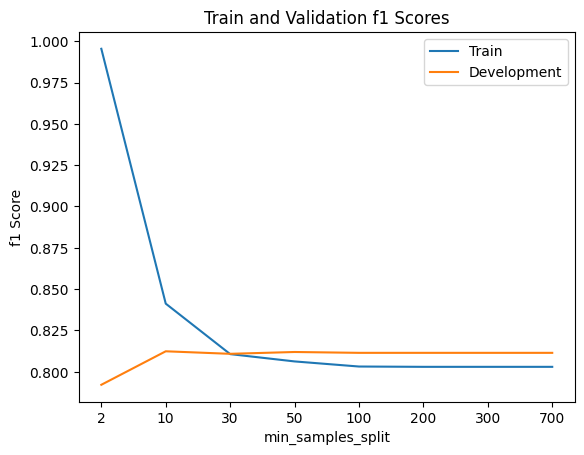

In [38]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('min_samples_split')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [43]:
best_ind = np.argmax(f1_list_dev)
best_param = min_samples_split_list[best_ind]

print("Parameter with best performance is: ",best_param)

Parameter with best performance is: 10


The model performed best around when the parameter is 10

In [50]:
min_samples_split_list = np.arange(2, 30)

In [51]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for min_samples_split in min_samples_split_list:
    model = RandomForestClassifier(min_samples_split = min_samples_split,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

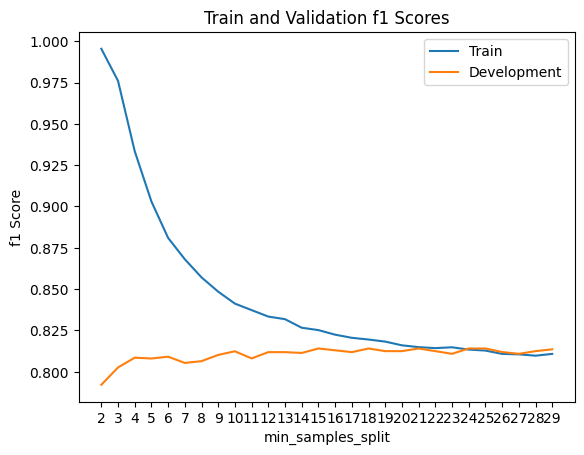

In [52]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('min_samples_split')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(min_samples_split_list )),labels=min_samples_split_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [53]:
best_ind = np.argmax(f1_list_dev)
best_param = min_samples_split_list[best_ind]

print("Parameter with best performance is:",best_param)

Parameter with best performance is: 15


> The model performed best when the parameter is 15. We are going with 15 for `min_samples_split`

#### Choosing `max_depth` Hyperparameter Value

In [67]:
max_depth_list = [1,2, 3, 4, 8, 16, 32, 64, None]

In [68]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth=max_depth,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

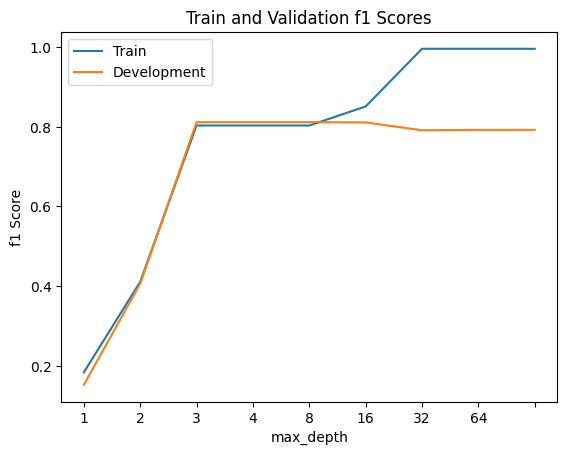

In [69]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('max_depth')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(max_depth_list)),labels=max_depth_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [70]:
best_ind = np.argmax(f1_list_dev)
best_param = max_depth_list[best_ind]

print("Parameter with best performance is:",best_param)

Parameter with best performance is: 3


> The model performed best when the parameter is 3. We are going with 3 for `max_depth`

#### Choosing `n_estimators` Hyperparameter Value

In [77]:
n_estimators_list = [10,50,100,500,1000,2000]

In [78]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

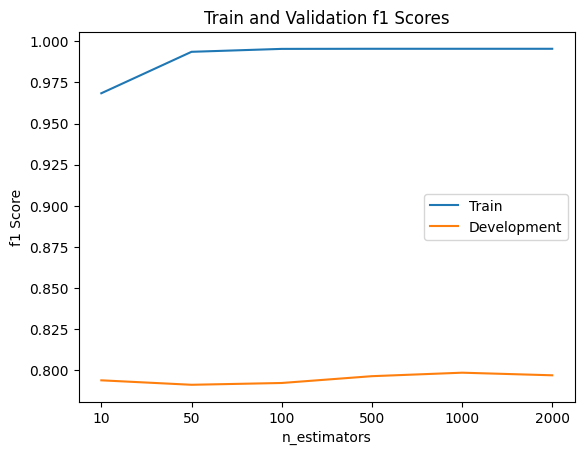

In [79]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('n_estimators')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [80]:
best_ind = np.argmax(f1_list_dev)
best_param = n_estimators_list[best_ind]

print("Parameter with best performance is:",best_param)

Parameter with best performance is: 1000


The model performed best around when the parameter is 1000

In [81]:
n_estimators_list = np.arange(500,1600,100)

> <b>NOTE:</b> The cell below takes a lot of time to run

In [82]:
accuracy_list_train = []
f1_list_train = []
accuracy_list_dev = []
f1_list_dev = []

for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators=n_estimators,
                                   random_state = 123).fit(X_train,y_train) 
    predictions_train = model.predict(X_train)
    predictions_dev = model.predict(X_dev)
    accuracy_train = accuracy_score(predictions_train,y_train)
    f1_train = f1_score(predictions_train,y_train)
    accuracy_dev = accuracy_score(predictions_dev,y_dev)
    f1_dev = f1_score(predictions_dev,y_dev)
    accuracy_list_train.append(accuracy_train)
    f1_list_train.append(f1_train)
    accuracy_list_dev.append(accuracy_dev)
    f1_list_dev.append(f1_dev)

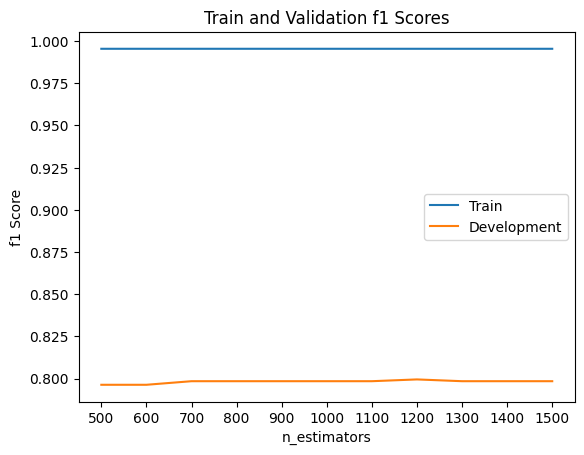

In [83]:
plt.title('Train and Validation f1 Scores')
plt.xlabel('n_estimators')
plt.ylabel('f1 Score')
plt.xticks(ticks = range(len(n_estimators_list)),labels=n_estimators_list) 
plt.plot(f1_list_train)
plt.plot(f1_list_dev)
plt.legend(['Train','Development']);

In [84]:
best_ind = np.argmax(f1_list_dev)
best_param = n_estimators_list[best_ind]

print("Parameter with best performance is:",best_param)

Parameter with best performance is: 1200


> The model performed best when the parameter is 1200. We are going with 1200 for `n_estimators`

### Model Building

In [92]:
random_forest_model = RandomForestClassifier(n_estimators = 1200,
                                             max_depth = 3, 
                                             min_samples_split = 15,
                                             random_state=1234).fit(X_train,y_train)

In [93]:
print(f"f1 for train:\n\tf1 score: {f1_score(random_forest_model.predict(X_train),y_train):.4f}")
print(f"f1 for dev:\n\tf1 score: {f1_score(random_forest_model.predict(X_dev),y_dev):.4f}")

f1 for train:
	f1 score: 0.7533
f1 for dev:
	f1 score: 0.7746
